In [2]:
import networkx as nx
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Update path if necessary)
file_path = "web-Google.mtx"  # Update with the correct location



In [3]:
# Read the MTX file into a sparse matrix
matrix = scipy.io.mmread(file_path)

# Convert the sparse matrix into an edge list
rows, cols = matrix.nonzero()
edges = list(zip(rows, cols))

In [4]:
# Create a directed graph using NetworkX
G = nx.DiGraph()
G.add_edges_from(edges)

print(f"Graph Loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

Graph Loaded: 875713 nodes, 5105039 edges


In [7]:
# Faster PageRank with looser tolerance and fewer iterations
pagerank = nx.pagerank(G, alpha=0.85, max_iter=50, tol=1e-03)

# In-Degree Centrality (already fast, no changes needed)
in_degree_centrality = {node: deg / (len(G) - 1) for node, deg in G.in_degree()}

betweenness_centrality = nx.betweenness_centrality(G, k=100, normalized=True)


In [8]:
# Identify top 3 most important nodes for each metric
top_nodes_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:3]
top_nodes_indegree = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_nodes_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

# Convert results to DataFrame for display
df_importance = pd.DataFrame({
    "Top PageRank Nodes": [node[0] for node in top_nodes_pagerank],
    "Top In-Degree Nodes": [node[0] for node in top_nodes_indegree],
    "Top Betweenness Nodes": [node[0] for node in top_nodes_betweenness]
})

print(df_importance)

   Top PageRank Nodes  Top In-Degree Nodes  Top Betweenness Nodes
0              163075               537039                 560622
1              537039               597621                 801143
2              597621               504140                 751384


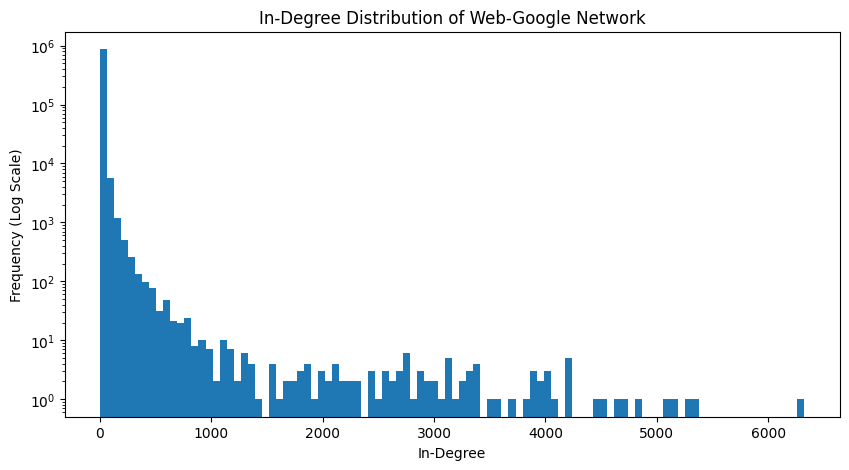

In [9]:
# Visualize degree distribution
degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)
plt.figure(figsize=(10, 5))
plt.hist(degree_sequence, bins=100, log=True)
plt.title("In-Degree Distribution of Web-Google Network")
plt.xlabel("In-Degree")
plt.ylabel("Frequency (Log Scale)")
plt.show()

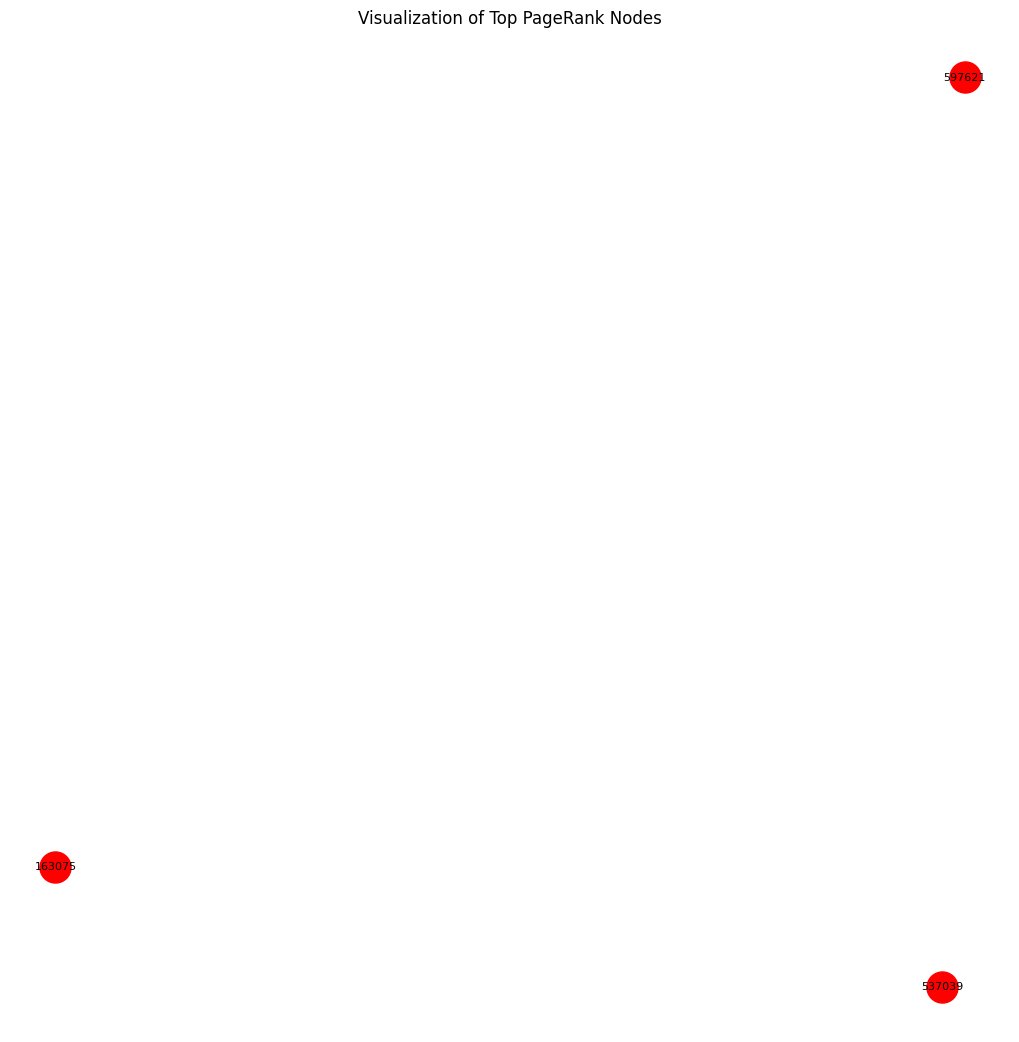

In [10]:
# Visualization of the top PageRank nodes
plt.figure(figsize=(10, 10))
subgraph = G.subgraph([node[0] for node in top_nodes_pagerank])
nx.draw(subgraph, with_labels=True, node_color='red', edge_color='gray', node_size=500, font_size=8)
plt.title("Visualization of Top PageRank Nodes")
plt.show()